In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBuenosAires'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df)
df = df[:-20]
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [18]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=100,activation='relu',input_shape=(lag,1))))
model.add(keras.layers.Dense(units=1))
optimizer = keras.optimizers.Adam(5e-2)
model.compile(optimizer,loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=16,verbose=2)

Train on 232 samples, validate on 55 samples
Epoch 1/500
 - 1s - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/500
 - 0s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 3/500
 - 0s - loss: 2.3697e-04 - mse: 2.3697e-04 - val_loss: 7.0333e-04 - val_mse: 7.0333e-04
Epoch 4/500
 - 0s - loss: 1.5905e-04 - mse: 1.5905e-04 - val_loss: 6.2409e-04 - val_mse: 6.2409e-04
Epoch 5/500
 - 0s - loss: 1.1242e-04 - mse: 1.1242e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 6/500
 - 0s - loss: 1.3071e-04 - mse: 1.3071e-04 - val_loss: 7.3366e-04 - val_mse: 7.3366e-04
Epoch 7/500
 - 0s - loss: 8.5937e-05 - mse: 8.5937e-05 - val_loss: 9.1403e-04 - val_mse: 9.1403e-04
Epoch 8/500
 - 0s - loss: 1.2990e-04 - mse: 1.2990e-04 - val_loss: 5.3100e-04 - val_mse: 5.3100e-04
Epoch 9/500
 - 0s - loss: 6.6074e-05 - mse: 6.6074e-05 - val_loss: 7.3902e-04 - val_mse: 7.3902e-04
Epoch 10/500
 - 0s - loss: 5.7954e-05 - mse: 5.7954e-05 - val_loss: 6.2912e-04 - val_mse: 6.291

Epoch 84/500
 - 0s - loss: 3.6209e-05 - mse: 3.6209e-05 - val_loss: 7.3180e-04 - val_mse: 7.3180e-04
Epoch 85/500
 - 0s - loss: 6.5149e-05 - mse: 6.5149e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 86/500
 - 0s - loss: 1.5944e-04 - mse: 1.5944e-04 - val_loss: 8.6389e-04 - val_mse: 8.6389e-04
Epoch 87/500
 - 0s - loss: 7.4911e-05 - mse: 7.4911e-05 - val_loss: 5.4832e-04 - val_mse: 5.4832e-04
Epoch 88/500
 - 0s - loss: 7.6292e-05 - mse: 7.6292e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 89/500
 - 0s - loss: 1.5027e-04 - mse: 1.5027e-04 - val_loss: 8.1286e-04 - val_mse: 8.1286e-04
Epoch 90/500
 - 0s - loss: 1.7095e-04 - mse: 1.7095e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 91/500
 - 0s - loss: 1.7009e-04 - mse: 1.7009e-04 - val_loss: 5.1982e-04 - val_mse: 5.1982e-04
Epoch 92/500
 - 0s - loss: 2.7956e-05 - mse: 2.7956e-05 - val_loss: 5.0690e-04 - val_mse: 5.0690e-04
Epoch 93/500
 - 0s - loss: 2.6474e-05 - mse: 2.6474e-05 - val_loss: 6.2833e-04 - val_mse: 6.2833e-04
Epoch 94/500
 

Epoch 167/500
 - 0s - loss: 7.4083e-05 - mse: 7.4083e-05 - val_loss: 6.6071e-04 - val_mse: 6.6071e-04
Epoch 168/500
 - 0s - loss: 6.5948e-05 - mse: 6.5948e-05 - val_loss: 5.2583e-04 - val_mse: 5.2583e-04
Epoch 169/500
 - 0s - loss: 3.1772e-05 - mse: 3.1772e-05 - val_loss: 5.6999e-04 - val_mse: 5.6999e-04
Epoch 170/500
 - 0s - loss: 6.9611e-05 - mse: 6.9611e-05 - val_loss: 6.1242e-04 - val_mse: 6.1242e-04
Epoch 171/500
 - 0s - loss: 9.3992e-05 - mse: 9.3992e-05 - val_loss: 7.7035e-04 - val_mse: 7.7035e-04
Epoch 172/500
 - 0s - loss: 1.1969e-04 - mse: 1.1969e-04 - val_loss: 6.8877e-04 - val_mse: 6.8877e-04
Epoch 173/500
 - 0s - loss: 2.3571e-04 - mse: 2.3571e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 174/500
 - 0s - loss: 1.1418e-04 - mse: 1.1418e-04 - val_loss: 7.5536e-04 - val_mse: 7.5536e-04
Epoch 175/500
 - 0s - loss: 5.5311e-05 - mse: 5.5311e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 176/500
 - 0s - loss: 6.5826e-05 - mse: 6.5826e-05 - val_loss: 6.9042e-04 - val_mse: 6.9042e

 - 0s - loss: 8.1080e-05 - mse: 8.1080e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 251/500
 - 0s - loss: 1.2326e-04 - mse: 1.2326e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 252/500
 - 0s - loss: 1.3440e-04 - mse: 1.3440e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 253/500
 - 0s - loss: 4.0345e-05 - mse: 4.0345e-05 - val_loss: 7.0956e-04 - val_mse: 7.0956e-04
Epoch 254/500
 - 0s - loss: 1.6431e-05 - mse: 1.6431e-05 - val_loss: 6.6331e-04 - val_mse: 6.6331e-04
Epoch 255/500
 - 0s - loss: 2.2601e-05 - mse: 2.2601e-05 - val_loss: 9.1242e-04 - val_mse: 9.1242e-04
Epoch 256/500
 - 0s - loss: 1.9483e-05 - mse: 1.9483e-05 - val_loss: 7.3592e-04 - val_mse: 7.3592e-04
Epoch 257/500
 - 0s - loss: 4.0287e-05 - mse: 4.0287e-05 - val_loss: 9.8011e-04 - val_mse: 9.8011e-04
Epoch 258/500
 - 0s - loss: 3.9311e-05 - mse: 3.9311e-05 - val_loss: 8.1119e-04 - val_mse: 8.1119e-04
Epoch 259/500
 - 0s - loss: 1.0588e-04 - mse: 1.0588e-04 - val_loss: 6.3779e-04 - val_mse: 6.3779e-04
Epoch 260/500
 - 0

Epoch 333/500
 - 0s - loss: 9.0042e-04 - mse: 9.0042e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 334/500
 - 0s - loss: 4.6802e-04 - mse: 4.6802e-04 - val_loss: 9.0882e-04 - val_mse: 9.0882e-04
Epoch 335/500
 - 0s - loss: 1.3683e-04 - mse: 1.3683e-04 - val_loss: 7.0861e-04 - val_mse: 7.0861e-04
Epoch 336/500
 - 0s - loss: 3.2739e-05 - mse: 3.2739e-05 - val_loss: 5.7370e-04 - val_mse: 5.7370e-04
Epoch 337/500
 - 0s - loss: 2.7596e-05 - mse: 2.7596e-05 - val_loss: 7.7562e-04 - val_mse: 7.7562e-04
Epoch 338/500
 - 0s - loss: 1.6644e-05 - mse: 1.6644e-05 - val_loss: 5.2825e-04 - val_mse: 5.2825e-04
Epoch 339/500
 - 0s - loss: 2.4987e-05 - mse: 2.4987e-05 - val_loss: 7.3666e-04 - val_mse: 7.3666e-04
Epoch 340/500
 - 0s - loss: 3.9136e-05 - mse: 3.9136e-05 - val_loss: 6.8032e-04 - val_mse: 6.8032e-04
Epoch 341/500
 - 0s - loss: 5.3944e-05 - mse: 5.3944e-05 - val_loss: 5.2980e-04 - val_mse: 5.2980e-04
Epoch 342/500
 - 0s - loss: 2.8297e-05 - mse: 2.8297e-05 - val_loss: 8.5637e-04 - val_mse:

Epoch 416/500
 - 0s - loss: 1.5660e-04 - mse: 1.5660e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 417/500
 - 0s - loss: 4.2512e-05 - mse: 4.2512e-05 - val_loss: 9.4605e-04 - val_mse: 9.4605e-04
Epoch 418/500
 - 0s - loss: 4.9360e-05 - mse: 4.9360e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 419/500
 - 0s - loss: 6.1107e-05 - mse: 6.1107e-05 - val_loss: 9.5219e-04 - val_mse: 9.5219e-04
Epoch 420/500
 - 0s - loss: 9.0295e-05 - mse: 9.0295e-05 - val_loss: 9.6001e-04 - val_mse: 9.6001e-04
Epoch 421/500
 - 0s - loss: 6.5049e-05 - mse: 6.5049e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 422/500
 - 0s - loss: 4.7446e-05 - mse: 4.7446e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 423/500
 - 0s - loss: 8.4286e-05 - mse: 8.4286e-05 - val_loss: 9.9494e-04 - val_mse: 9.9494e-04
Epoch 424/500
 - 0s - loss: 5.7437e-05 - mse: 5.7437e-05 - val_loss: 8.7847e-04 - val_mse: 8.7847e-04
Epoch 425/500
 - 0s - loss: 1.0041e-04 - mse: 1.0041e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 426/500
 - 0s 

Epoch 500/500
 - 0s - loss: 6.2721e-05 - mse: 6.2721e-05 - val_loss: 8.1073e-04 - val_mse: 8.1073e-04


In [20]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [21]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict))) 
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 143.36749036567846
test mse squared: 380.49938763701783


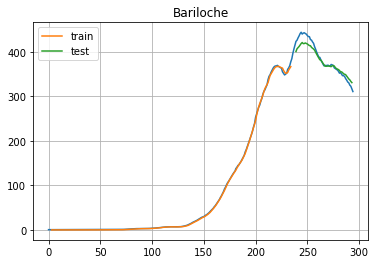

In [23]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Bariloche')
plt.legend()
plt.show()

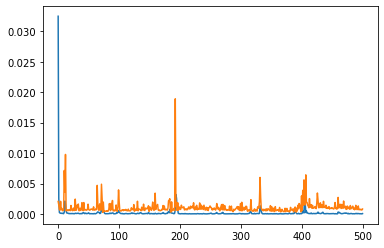

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [25]:
n = len(test_data)
x_input=test_data[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<20): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, lag, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, lag,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.73468596]]
2 day output [[0.74623525]]
3 day output [[0.7563631]]
4 day output [[0.7653108]]
5 day output [[0.77314675]]
6 day output [[0.77993894]]
7 day output [[0.7857788]]
8 day output [[0.79076225]]
9 day output [[0.79498684]]
10 day output [[0.79854745]]
11 day output [[0.80153334]]
12 day output [[0.8040267]]
13 day output [[0.8061012]]
14 day output [[0.80782175]]
15 day output [[0.80924517]]
16 day output [[0.81042]]
17 day output [[0.811388]]
18 day output [[0.81218433]]
19 day output [[0.8128386]]


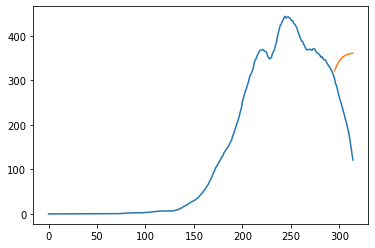

In [26]:
plt.plot(df1)
days = np.arange(len(df1))
dias_forecast = days[-20:]
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))